# Quantum Increment & Decrement

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [8]:
import numpy as np
import qiskit
from qiskit import visualization, QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
%matplotlib inline
from math import pi
from Circuits import getBloch, stateGenerator, getMeasure, makeCirc2, makeCirc3

In [9]:
backend = Aer.get_backend('statevector_simulator')

In [10]:
def makeCircInc(n, state):
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(state)
    circ.initialize(initializedState, qr)
    return circ

In [11]:
def increment(n, currentState):
    circ = makeCircInc(n, currentState)
    for i in range(n-1, 0, -1):
        circ.mct([j for j in range(n-i, n)], n-i-1)
    circ.x(n-1)
    circ.barrier()
    circ.measure(range(n), range(n))
    return circ

In [12]:
n = 5
circ = increment(n, '0'*n)

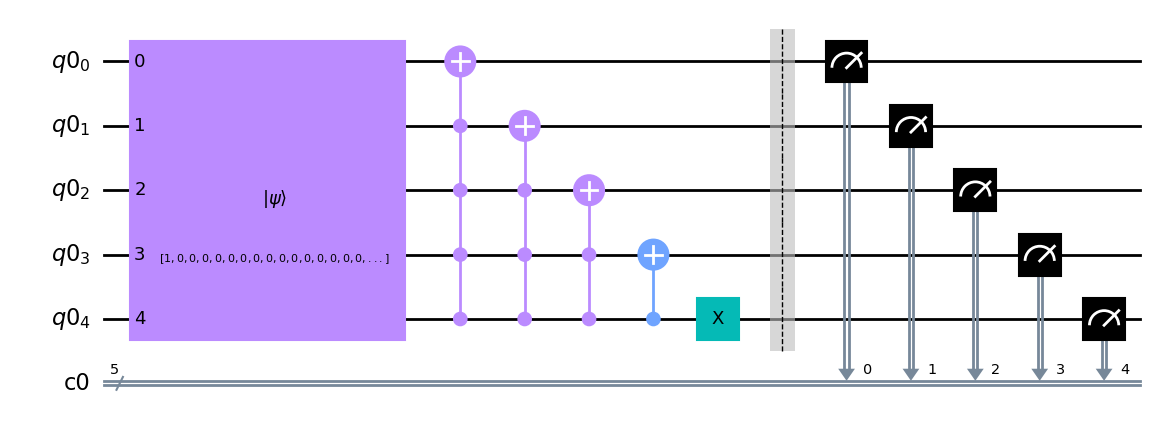

In [13]:
circ.draw('mpl')

In [14]:
def decrement(n, currentState):
    circ = makeCircInc(n, currentState)
    circ.x(n-1)
    for i in range(1, n):
        circ.mct([j for j in range(n-i, n)], n-i-1)
    circ.barrier()
    circ.measure(range(n), range(n))
    return circ

In [15]:
circ = decrement(n, '0'*n)

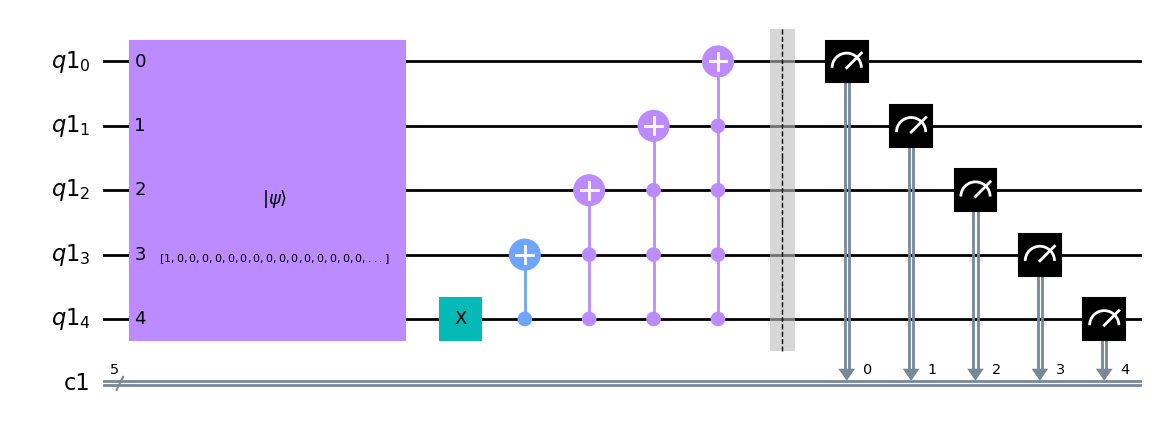

In [16]:
circ.draw('mpl', fold=-1)

In [18]:
n = 4
circ = increment(n, '0'*n)
print(getMeasure(circ, 1, backend)[0][::-1])
for i in range(0, 17):
    circ = increment(n, getMeasure(circ, 1, backend)[0][::-1])
    print(getMeasure(circ, 1, backend)[0][::-1])

0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111
0000
0001
0010
